<a href="https://colab.research.google.com/github/bibell0211/phantichdulieu/blob/main/CiFa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data() 
X_train.shape #(50.000 mẫu , kích thước ảnh 32x32 ,mảng 3 chiều)

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape # Ảnh Test

(10000, 32, 32, 3)

In [4]:
y_train.shape # Ảnh Train


(50000, 1)

In [5]:
y_train[:5] # Mảng 2 chiều

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,) # Chuyển  thành mảng 1 chiều
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [16]:
classes = ["máy bay","automobile","con chim","con mèo","con nai","con chó","con ếch","con ngựa","cái tàu","xe tải"]

In [9]:
def plot_sample(X, y, index): # Dán nhãn cho data
    plt.figure(figsize = (15,2)) # kích thước
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

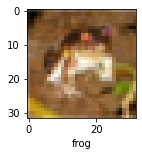

In [10]:
plot_sample(X_train, y_train, 0)

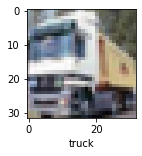

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# Convolutional Neural Network (CNN)
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # Truyền vào kích thước ảnh , mảng 3 chiều
    layers.MaxPooling2D((2, 2)),
 
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4721 - accuracy: 0.4694
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1141 - accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9911 - accuracy: 0.6529
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9078 - accuracy: 0.6853
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8439 - accuracy: 0.7077
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7907 - accuracy: 0.7268
Epoch 7/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7445 - accuracy: 0.7418
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7069 - accuracy: 0.7552
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6649 - accuracy: 0.7681
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [18]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes)) # Báo cáo phân loại

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      1000
           1       0.81      0.82      0.81      1000
           2       0.64      0.57      0.61      1000
           3       0.59      0.46      0.52      1000
           4       0.58      0.70      0.63      1000
           5       0.60      0.63      0.61      1000
           6       0.85      0.69      0.76      1000
           7       0.60      0.86      0.71      1000
           8       0.78      0.82      0.80      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9405 - accuracy: 0.6954


[0.9404929876327515, 0.6953999996185303]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.56015376e-04, 1.14310315e-04, 1.30555627e-03, 9.08667564e-01,
        2.28499557e-04, 7.64365569e-02, 1.12647954e-02, 8.02157811e-05,
        1.31363934e-03, 1.32748173e-04],
       [4.12163383e-04, 8.37948732e-03, 1.04555863e-06, 7.75673016e-07,
        3.52493252e-08, 5.54376243e-08, 5.36666134e-09, 8.97811745e-08,
        9.91113842e-01, 9.24640190e-05],
       [3.83656360e-02, 8.64642784e-02, 4.85299854e-04, 2.53085745e-03,
        4.14005807e-03, 9.82044512e-05, 4.46035556e-05, 2.83476384e-03,
        8.52406740e-01, 1.26296142e-02],
       [9.13693666e-01, 2.91006155e-02, 7.61055993e-03, 1.65481993e-04,
        4.04388793e-02, 4.92464414e-06, 5.14892126e-05, 2.04477506e-03,
        6.72690757e-03, 1.62613578e-04],
       [3.39960707e-07, 1.35273285e-06, 7.16674142e-03, 4.62139677e-03,
        9.08106685e-01, 2.57639145e-03, 7.74348825e-02, 9.20124658e-05,
        1.80670796e-07, 7.61669128e-08]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

'máy bay'

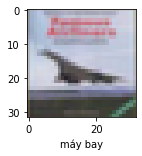

In [60]:
plot_sample(X_test, y_test,3)
classes[y_classes[3]]

In [24]:
from PIL import Image
 
def load_image(filename):
  global label_packed
  # load tấm ảnh lên
  image = Image.open(filename)
  image = image.resize((32,32))
  image = np.expand_dims(image, axis=0)
  image = np.array(image)
  img = image.astype('float32')
  img=image/255.0
  return img

In [54]:
img_test = load_image('conngua.jpg')
digit = cnn.predict(img_test)
print(classes[np.argmax(digit)])

con ngựa
